In [1]:
import matplotlib.pyplot as plt
import pandas
import matplotlib

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

# import matplotlib.font_manager as font_manager
# prop = font_manager.FontProperties(fname="/home/wenjie/.local/share/fonts/LinLibertine_Rah.ttf")
# print(prop.get_name())

# nice_fonts = {
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif" : prop.get_name(),
# }
# matplotlib.rcParams.update(nice_fonts)

In [2]:
data = pandas.read_csv("c-results.csv")

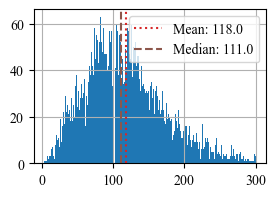

In [3]:
num_input_tokens = data["num_tokens"]
num_input_tokens_sample = num_input_tokens[num_input_tokens <= 300]
plt.figure(figsize=(3, 2))
plt.hist(num_input_tokens_sample, bins=300, histtype='barstacked', facecolor='tab:blue')
mean = num_input_tokens.mean()
median = num_input_tokens.median()
plt.axvline(x=mean, linestyle=":", color="tab:red", label=f"Mean: {mean:.01f}")
plt.axvline(x=median, linestyle="--",color="tab:brown", label=f"Median: {median:.01f}")
plt.legend()
plt.grid()
plt.savefig("c-tokens.pdf", bbox_inches="tight")
plt.show()

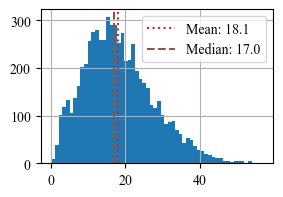

In [4]:
num_input_tokens = data["num_lines"]
num_input_tokens_sample = num_input_tokens[num_input_tokens <= 60]
plt.figure(figsize=(3, 2))
plt.hist(num_input_tokens_sample, bins=58, histtype='barstacked', facecolor='tab:blue')
mean = num_input_tokens.mean()
median = num_input_tokens.median()
plt.axvline(x=mean, linestyle=":", color="tab:red", label=f"Mean: {mean:.01f}")
plt.axvline(x=median, linestyle="--",color="tab:brown", label=f"Median: {median:.01f}")
plt.legend()
plt.grid()
plt.savefig("c-lines.pdf", bbox_inches="tight")
plt.show()


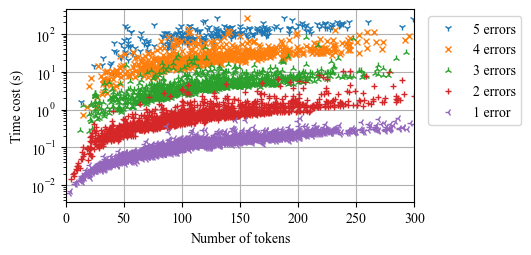

In [5]:
plt.figure(figsize=(4.5, 2.5))
plt.xlim([0, 300])
plt.yscale("log")
markers={5: "1", 4: "x", 3: "2", 2: "+", 1: "3"}
clr = {5: "#0b2a3f", 4: "#7a3d07", 3: "#0c6c0c", 2:"#d61112", 1:"#c186f7"}
for nummod in range(5, 0, -1):
    d_inp_time = data[data["dist"]==nummod][["num_tokens", "total_time"]]
    plt.plot(d_inp_time["num_tokens"], d_inp_time["total_time"], linestyle="",marker=markers[nummod], markersize=5, label=f"{nummod} errors" if nummod != 1 else f"{nummod} error")
plt.xlabel("Number of tokens")
plt.ylabel("Time cost (s)")
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("c-time-to-tokens.pdf", bbox_inches="tight")
plt.show()

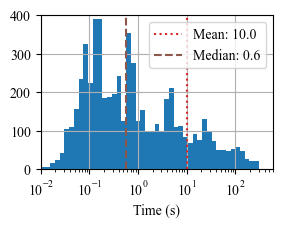

0.6243206521739131
0.8425611413043478
0.9707880434782609


In [6]:

import numpy as np

logbins = np.logspace(np.log10(0.01),np.log10(600),50)

total_time = data["total_time"]
total_time = total_time[total_time > 0]
plt.figure(figsize=(3, 2))
plt.hist(total_time, histtype='barstacked', facecolor='tab:blue', bins=logbins)
plt.xscale('log')
plt.axis([0.01, 600, 0, 400])
mean = total_time.mean()
median = total_time.median()
plt.xlabel("Time (s)")
plt.axvline(x=mean, linestyle=":", color="tab:red", label=f"Mean: {mean:.01f}")
plt.axvline(x=median, linestyle="--",color="tab:brown", label=f"Median: {median:.01f}")
plt.legend()
plt.grid()
plt.savefig("c-time.pdf", bbox_inches="tight")
plt.show()

print((total_time<1).mean())
print((total_time<10).mean())
print((total_time<100).mean())